# <center>CIFAR10 Dataset</center>

**Labels**

- 0: airplane		  								
- 1: automobile		  								
- 2: bird				  						
- 3: cat					  					
- 4: deer						  				
- 5: dog							  			
- 6: frog								  		
- 7: horse								  		
- 8: ship									  	
- 9: truck  

## Modules

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Initialize the features and labels

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 898s 5us/step


In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_train[0].shape

(32, 32, 3)

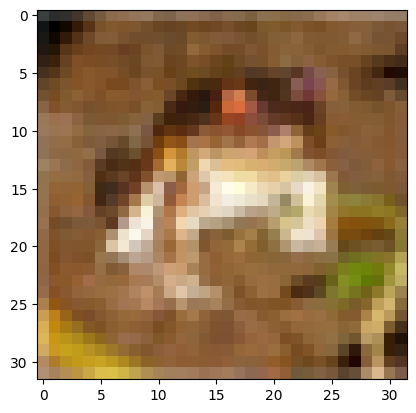

In [8]:
plt.imshow(X_train[0])
plt.show()

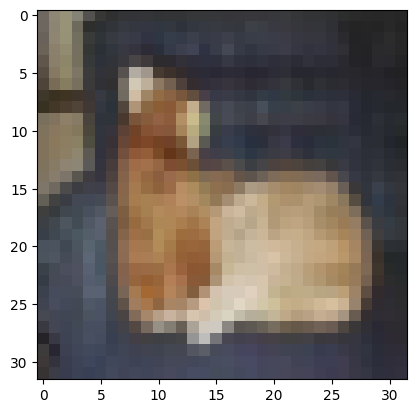

In [9]:
plt.imshow(X_train[17])
plt.show()

In [10]:
X_train[0].max()

255

In [11]:
X_train = X_train / 255

In [12]:
X_test = X_test / 255

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_train[0]

array([6], dtype=uint8)

# Model training

In [19]:
model = Sequential()

# conv layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# conv layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax')) # multiclass

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [23]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5154 - accuracy: 0.4523 - val_loss: 1.2758 - val_accuracy: 0.5374
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1999 - accuracy: 0.5747 - val_loss: 1.1693 - val_accuracy: 0.5889
Epoch 3/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0647 - accuracy: 0.6255 - val_loss: 1.0966 - val_accuracy: 0.6142
Epoch 4/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9680 - accuracy: 0.6608 - val_loss: 1.0037 - val_accuracy: 0.6515
Epoch 5/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8800 - accuracy: 0.6909 - val_loss: 1.0204 - val_accuracy: 0.6509
Epoch 6/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8125 - accuracy: 0.7155 - val_loss: 0.9978 - val_accuracy: 0.6534
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7473 - accuracy: 0.7399 - val_loss: 1.0115 -

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.515409,0.45226,1.275826,0.5374
1,1.199904,0.57470,1.169292,0.5889
2,1.064697,0.62554,1.096639,0.6142
3,0.967964,0.66080,1.003680,0.6515
4,0.879951,0.69092,1.020378,0.6509
5,0.812469,0.71554,0.997787,0.6534
6,0.747302,0.73994,1.011508,0.6594
7,0.684362,0.76078,1.017701,0.6622


In [26]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

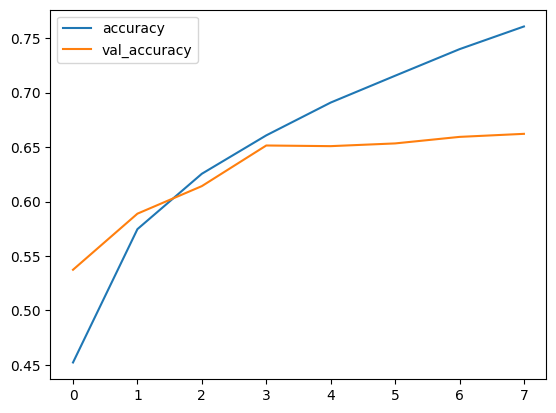

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

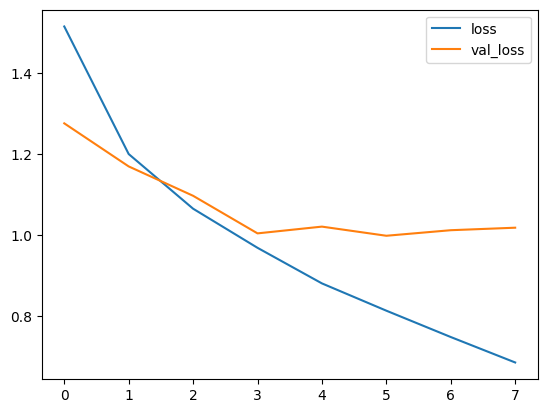

In [28]:
metrics[['loss', 'val_loss']].plot()

In [29]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0177 - accuracy: 0.6622


[1.0177010297775269, 0.6621999740600586]

In [31]:
predict = model.predict(X_test) 
predict_class = np.argmax(predict, axis=1)

313/313 [==============================] - 3s 8ms/step


In [32]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1000
           1       0.67      0.89      0.76      1000
           2       0.56      0.58      0.57      1000
           3       0.52      0.43      0.47      1000
           4       0.63      0.61      0.62      1000
           5       0.55      0.56      0.55      1000
           6       0.81      0.69      0.74      1000
           7       0.74      0.70      0.72      1000
           8       0.73      0.81      0.77      1000
           9       0.75      0.67      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



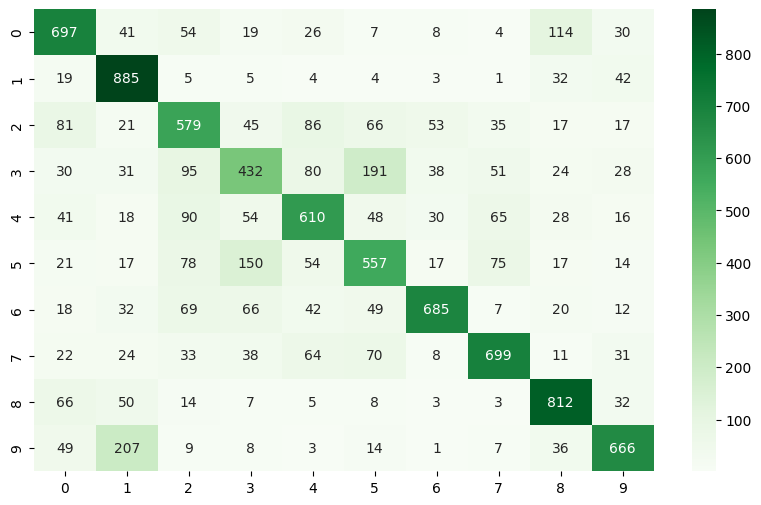

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predict_class), annot=True, fmt='.0f', cmap='Greens')
plt.show()

In [60]:
class_dict = {- 0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [86]:
def predictClass(index):

    predict = model.predict(X_test[index].reshape(1, 32, 32, 3)) 
    predict_class = np.argmax(predict, axis=1)
    
    print("The predicted class is", class_dict[tuple(predict_class)[0]])
    print("The actual class is", class_dict[y_test[index][0]])
    
    plt.imshow(X_test[index])
    plt.show()

1/1 [==============================] - 0s 27ms/step
The predicted class is frog
The actual class is frog


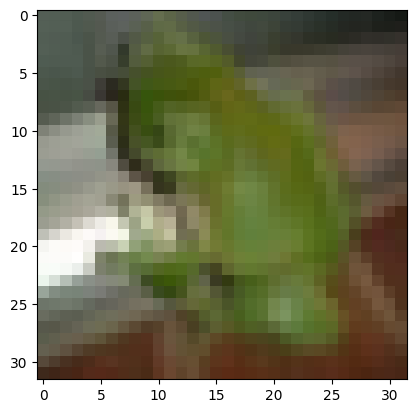

In [113]:
predictClass(7)